In [410]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

In [312]:
df_country = pd.read_csv("Country-data.csv")
df_customer = pd.read_csv("customers_data.csv")

## Exploratory Data Analysis

### Customer Data

In [5]:
df_customer.shape

(440, 11)

Our dataframe contains 440 observations and 11 variables.

In [7]:
df_customer.dtypes.value_counts()

int64    11
dtype: int64

All variables are integers.

In [3]:
df_customer.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2,Region_1,Region_2,Region_3
0,12669,9656,7561,214,2674,1338,0,1,0,0,1
1,7057,9810,9568,1762,3293,1776,0,1,0,0,1
2,6353,8808,7684,2405,3516,7844,0,1,0,0,1
3,13265,1196,4221,6404,507,1788,1,0,0,0,1
4,22615,5410,7198,3915,1777,5185,0,1,0,0,1


Above, we see the first rows of the dataframe.

In [4]:
df_customer.isna().sum()

Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
Channel_1           0
Channel_2           0
Region_1            0
Region_2            0
Region_3            0
dtype: int64

The table contains no missing values.

In [14]:
df_customer.nunique()

Fresh               433
Milk                421
Grocery             430
Frozen              426
Detergents_Paper    417
Delicassen          403
Channel_1             2
Channel_2             2
Region_1              2
Region_2              2
Region_3              2
dtype: int64

We observe in our table variables with binary values which we will analyze separately.

In [13]:
c_cols = df_customer.columns[df_customer.nunique() > 3]
b_cols = df_customer.columns[df_customer.nunique() < 3]

In [15]:
df_customer[c_cols].describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


Above, we can observe the statistics of the variables.

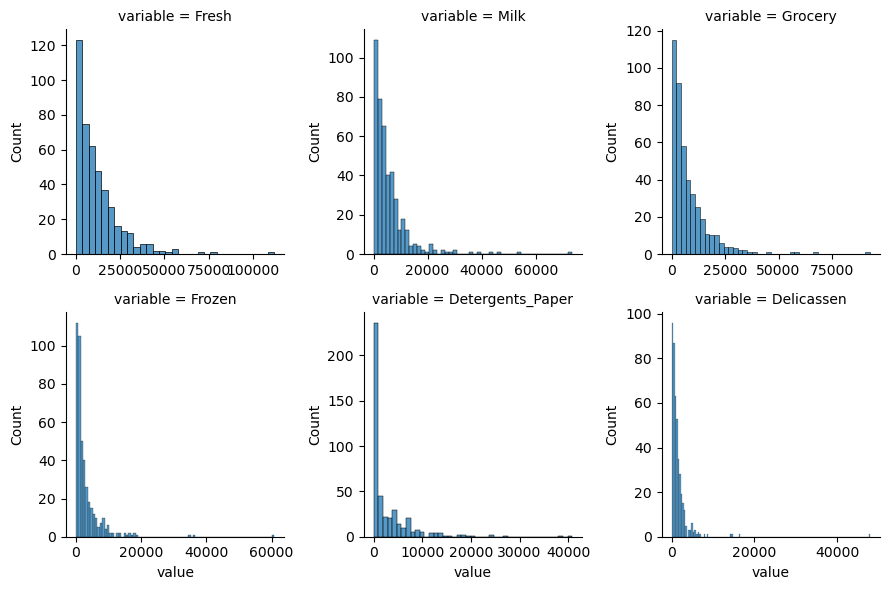

In [22]:
sns.FacetGrid(
    data=df_customer.melt(value_vars=c_cols),
    col_wrap=3,
    sharex=False,
    sharey=False,
    col="variable",
).map(sns.histplot, "value");

We note that the distributions of the variables are strongly right-skewed.

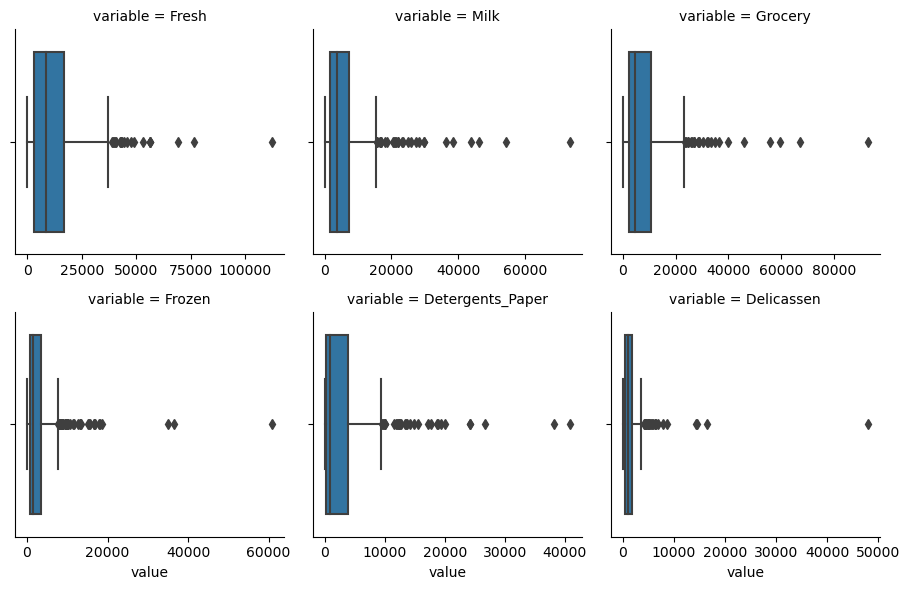

In [48]:
sns.FacetGrid(
    data=df_customer.melt(value_vars=c_cols),
    col_wrap=3,
    sharex=False,
    sharey=False,
    col="variable",
).map(sns.boxplot, "value");

By observing the box plots, we can highlight many aberrant values in our variables.

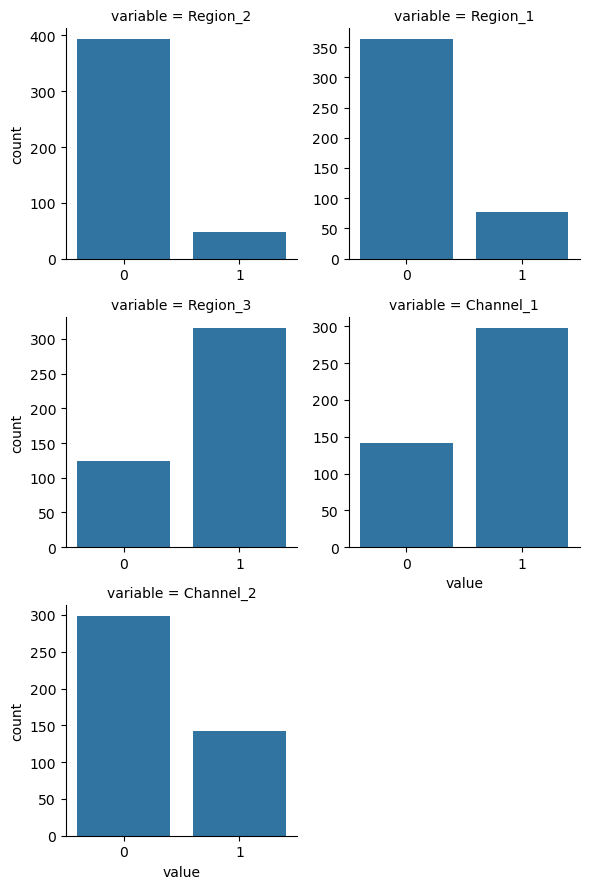

In [40]:
_df = df_customer.melt(value_vars=b_cols).value_counts().to_frame().reset_index()
_df.columns = ["variable", "value", "count"]
sns.FacetGrid(
    data=_df,
    col_wrap=2,
    sharex=False,
    sharey=False,
    col="variable",
).map(sns.barplot, "value", "count");

Above, we can observe the distributions of the values of the binary-valued variables. Some of them are severely unbalanced.

### Country Data

In [42]:
df_country.shape

(167, 10)

Our dataframe contains 167 observations and 10 variables.

In [43]:
df_country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


Above we can see the first rows of the table. This allows us to have an overview of the variables in the dataframe.

In [44]:
df_country.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

The dataframe does not contain any missing values.

In [45]:
df_country.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


Above, we can observe the statistics of the variables.

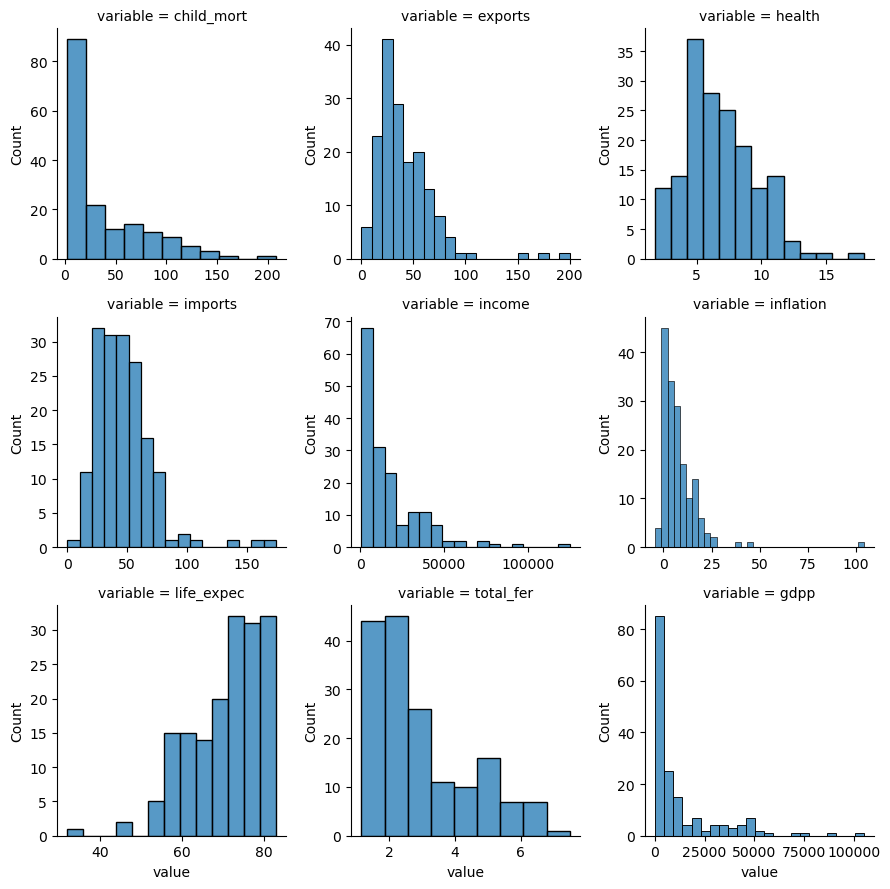

In [47]:
sns.FacetGrid(
    data=df_country.select_dtypes(np.number).melt(),
    col_wrap=3,
    sharex=False,
    sharey=False,
    col="variable",
).map(sns.histplot, "value");

Above, we observe the distributions of the variables. Some variables are strongly right-skewed, others are quite balanced, but with outliers.

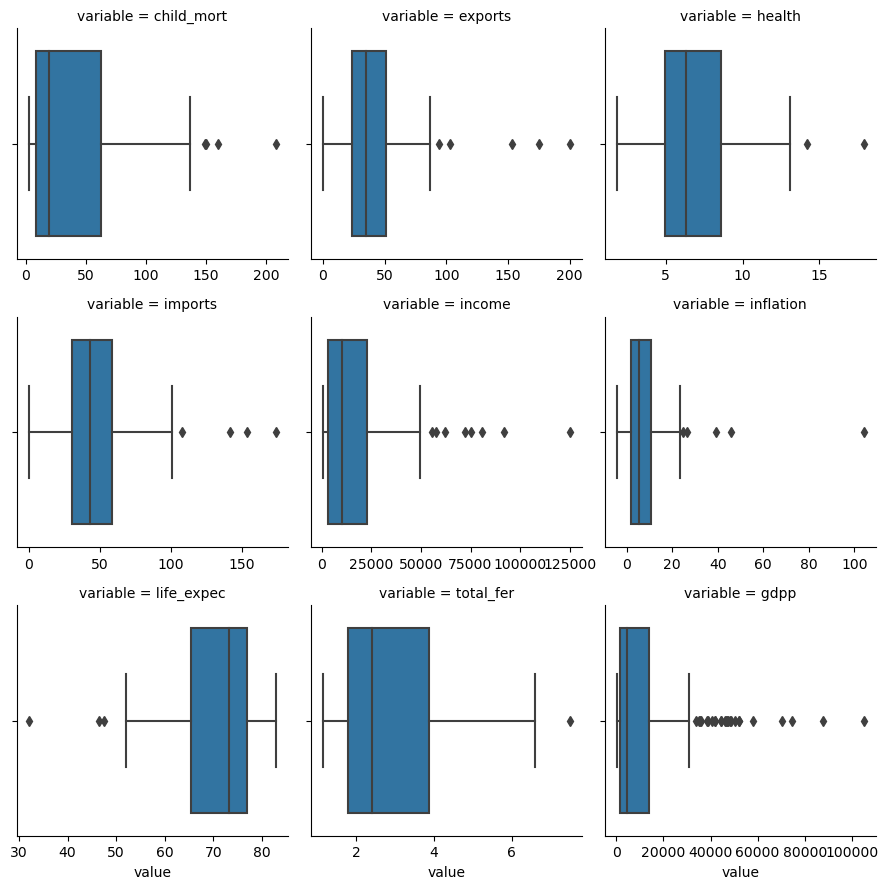

In [49]:
sns.FacetGrid(
    data=df_country.select_dtypes(np.number).melt(),
    col_wrap=3,
    sharex=False,
    sharey=False,
    col="variable",
).map(sns.boxplot, "value");

By observing the box plots, we can see that the variables have a fairly large number of outliers.

## Clustering

We will use the *silhouette score* and the *Davies-Bouldin score* as measures of model performance.

In [356]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

### Customer Data

In [314]:
X_customer = df_customer.copy()
num_cols = df_customer.columns[df_customer.nunique() > 3]
bin_cols = df_customer.columns[df_customer.nunique() < 3]

In [315]:
preprocess_customer = make_column_transformer(
    (StandardScaler(), num_cols),
    remainder="passthrough"
)

To choose the number of clusters, we will use the *Elbow Trick*.

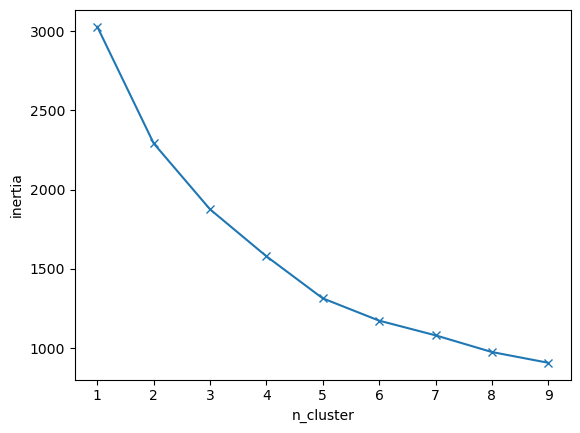

In [316]:
ks = np.arange(1, 10)
inertias = []
for k in ks:
    m = make_pipeline(
        preprocess_customer,
        KMeans(n_clusters=k),
    )
    m.fit(X_customer)
    inertias.append( m.named_steps["kmeans"].inertia_ )
plt.plot(ks, inertias, "x-")
plt.ylabel("inertia")
plt.xlabel("n_cluster")
plt.show()

In [357]:
model = make_pipeline(
    preprocess_customer,
    KMeans(n_clusters=5),
)
model.fit(X_customer)
df_customer["k_cluster"] = model.named_steps["kmeans"].labels_

In [358]:
df_customer["k_cluster"].value_counts()

3    242
1    127
0     60
4     10
2      1
Name: k_cluster, dtype: int64

Above, we can observe the numbers in each cluster.  We see that one of the clusters contains only one observation.

In [360]:
print("Davies Bouldin score: ", davies_bouldin_score(X_customer, model.named_steps["kmeans"].labels_))
print("Silhouette score: ", silhouette_score(X_customer, model.named_steps["kmeans"].labels_))

Davies Bouldin score:  0.9331474723598043
Silhouette score:  0.2984983883589824


Above we can see the performance of the model.

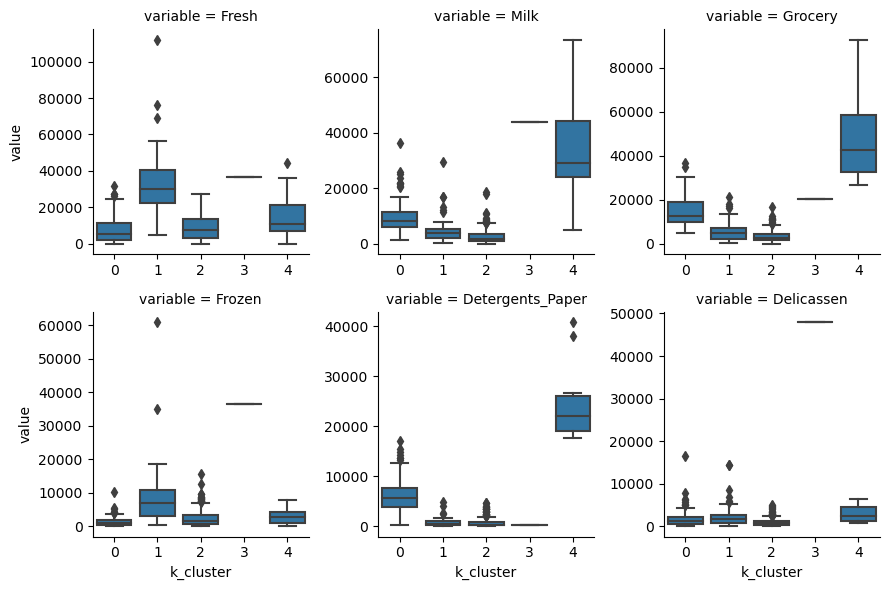

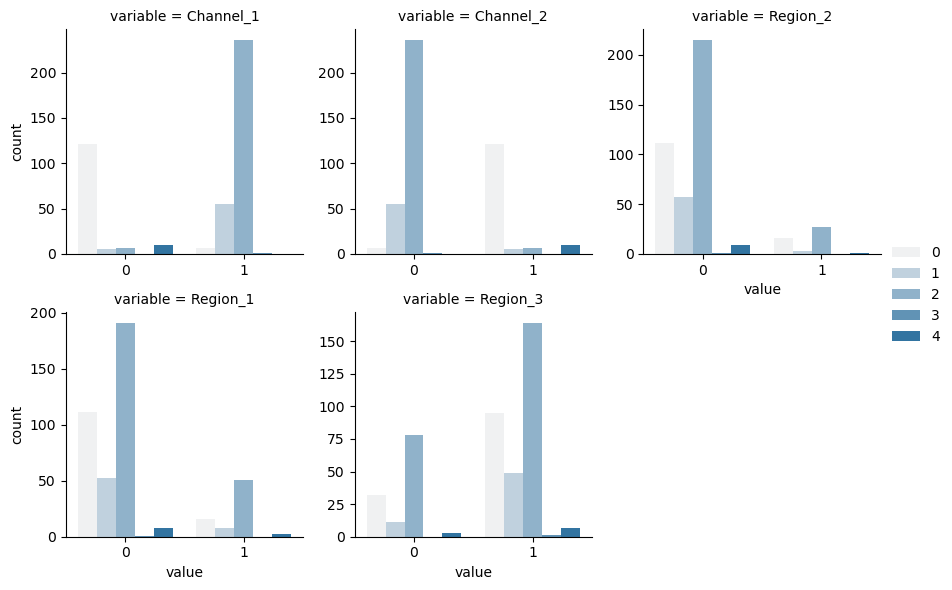

In [319]:
_df = df_customer.melt(id_vars="k_cluster", value_vars=b_cols).value_counts().to_frame().reset_index()
_df.columns = ["k_cluster", "variable", "value", "count"]

sns.FacetGrid(
    data=df_customer.melt(id_vars="k_cluster", value_vars=num_cols),
    col_wrap=3,
    sharex=False,
    sharey=False,
    col="variable",
).map(sns.boxplot, "k_cluster", "value");

g = sns.FacetGrid(
    data=_df,
    col_wrap=3,
    sharex=False,
    sharey=False,
    col="variable",
)
g.map(sns.barplot, "value", "count", "k_cluster")
g.add_legend();

The relationship between the values and the clusters allows us to see that each cluster has fairly similar needs for each type of product. On the other hand, because the binary-valued variables are quite unbalanced, we cannot really draw conclusions about their relationship with the clusters.

### Country Data

In [320]:
X_country = df_country.copy()
X_country = X_country.drop(columns="country")
cols = X_country.columns

In [321]:
preprocess_country = make_column_transformer(
    (StandardScaler(),cols),
    remainder="passthrough"
)

To choose the number of clusters, we will use the *Elbow Trick*.

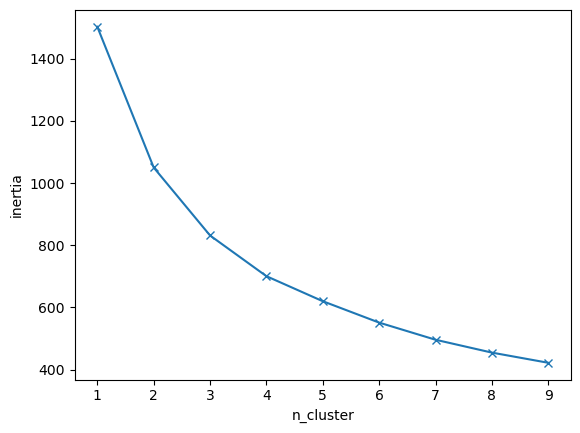

In [322]:
ks = np.arange(1, 10)
inertias = []

for k in ks:
    m = make_pipeline(
        preprocess_country,
        KMeans(n_clusters=k),
    )
    m.fit(X_country)
    inertias.append(m.named_steps["kmeans"].inertia_ )
plt.plot(ks, inertias, "x-")
plt.ylabel("inertia")
plt.xlabel("n_cluster")
plt.show()

In [373]:
model = make_pipeline(
    preprocess_country,
    KMeans(n_clusters=4),
)
model.fit(X_country)
df_country["k_cluster"] = model.named_steps["kmeans"].labels_

In [374]:
df_country["k_cluster"].value_counts()

1    85
0    47
2    32
3     3
Name: k_cluster, dtype: int64

Above, we can observe the numbers in each cluster.

In [375]:
print("Davies Bouldin score: ", davies_bouldin_score(X_country, model.named_steps["kmeans"].labels_))
print("Silhouette score: ", silhouette_score(X_country, model.named_steps["kmeans"].labels_))

Davies Bouldin score:  1.7387162362698707
Silhouette score:  0.20349642611843555


Above we can see the performance of the model.

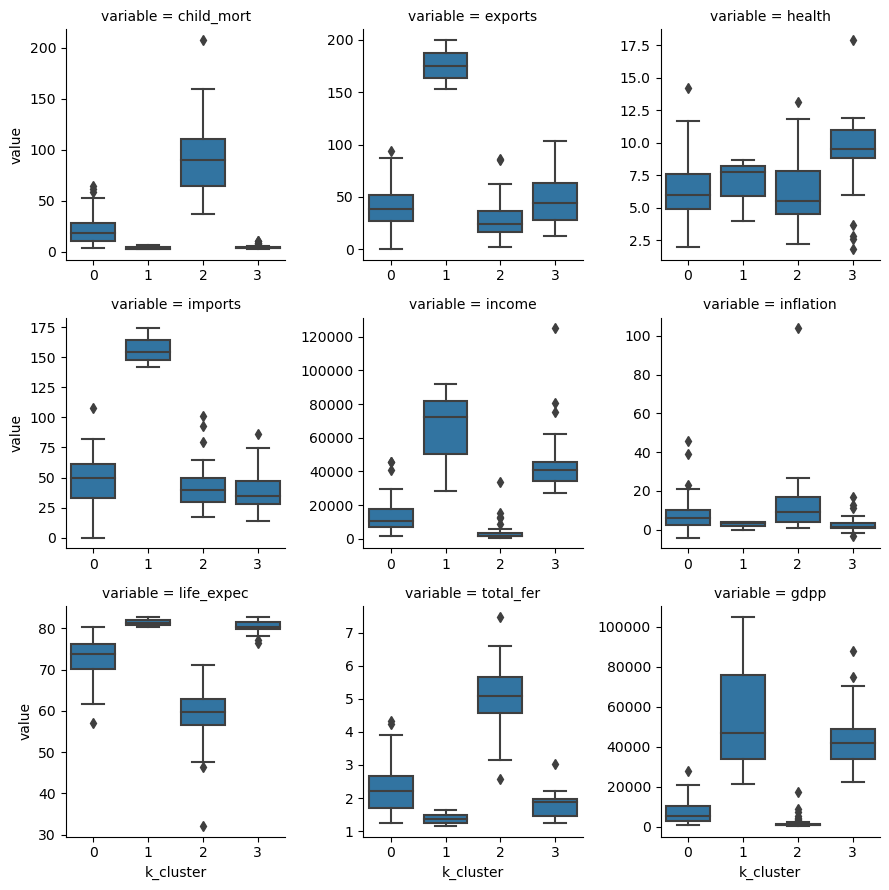

In [325]:
sns.FacetGrid(
    data=df_country.melt(id_vars="k_cluster", value_vars=cols),
    col_wrap=3,
    sharex=False,
    sharey=False,
    col="variable",
).map(sns.boxplot, "k_cluster", "value");

Above, we can observe the relationships between clusters and variables. We manage to draw some interesting relationships from it. For example, we see that one of the clusters has high values for the variables *exports*, *imports* and *income*. These countries can be considered to have good economic situations and we can draw links between this and other variables such as life expectancy which is high in these countries. We can conclude that clusters group countries according to their economic situation and their quality of life.

We will now try out other clustering algorithms.

### Clustering + PCA

In [335]:
def pca_components_elbow(X):
    N, d = X.shape
    
    trans = make_pipeline(
        StandardScaler(),
        PCA(n_components=d)
    )
    X_scaled = StandardScaler().fit_transform(X)
    
    trans = PCA(n_components=d)
    trans.fit(X_scaled)
    
    plt.plot(np.arange(d), trans.singular_values_)
    plt.xlabel("Component")
    plt.ylabel("Singular value")
    plt.show()

#### Customer Data

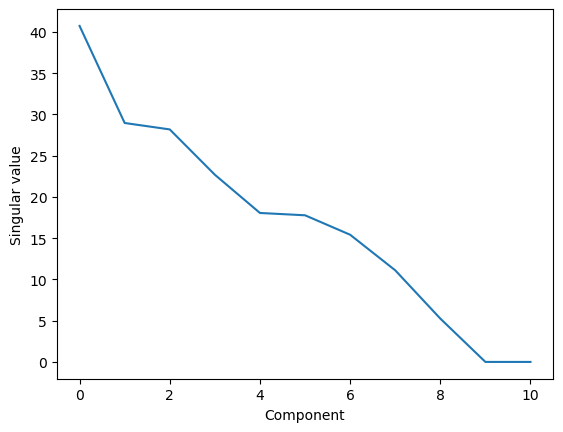

In [337]:
pca_components_elbow(X_customer)

In [364]:
nc = [1, 4, 9]
sc = {"n_components": nc, "silhouette_score":[], "davies_bouldin_score":[]}

for n in nc:
    model = make_pipeline(
        preprocess_customer,
        PCA(n_components=n),
        KMeans(n_clusters=4),
    )
    model.fit(X_customer)
    sc["silhouette_score"].append(silhouette_score(X_customer, model.named_steps["kmeans"].labels_))
    sc["davies_bouldin_score"].append(davies_bouldin_score(X_customer, model.named_steps["kmeans"].labels_))
    
pd.DataFrame(sc).set_index("n_components")

,silhouette_score,davies_bouldin_score
n_components,,
1,0.205281,1.688495
4,0.270471,1.066564
9,0.243654,1.045024


#### Country Data

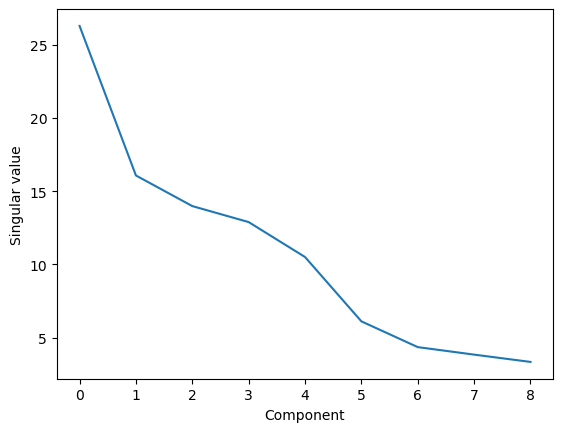

In [354]:
pca_components_elbow(X_country)

In [376]:
nc = [1, 5]
sc = {"n_components": nc, "silhouette_score":[], "davies_bouldin_score":[]}

for n in nc:
    model = make_pipeline(
        preprocess_country,
        PCA(n_components=n),
        KMeans(n_clusters=4),
    )
    model.fit(X_country)
    sc["silhouette_score"].append(silhouette_score(X_country, model.named_steps["kmeans"].labels_))
    sc["davies_bouldin_score"].append(davies_bouldin_score(X_country, model.named_steps["kmeans"].labels_))
    
pd.DataFrame(sc).set_index("n_components")

,silhouette_score,davies_bouldin_score
n_components,,
1,0.160893,0.922154
5,0.219679,1.757658


### Clustering + t-SNE

#### Customer Data

n_component=2

In [411]:
X_scaled = preprocess_customer.fit_transform(X_customer)
X_trans = TSNE(n_components=3).fit_transform(X_scaled)

model = KMeans(n_clusters=4)
model.fit(X_trans)

print("Davies Bouldin score: ", davies_bouldin_score(X_customer, model.labels_))
print("Silhouette score: ", silhouette_score(X_customer, model.labels_))

Davies Bouldin score:  2.003586605815828
Silhouette score:  0.013261378588797158


n_component=3

In [392]:
X_scaled = preprocess_customer.fit_transform(X_customer)
X_trans = TSNE(n_components=2).fit_transform(X_scaled)

model = KMeans(n_clusters=4)
model.fit(X_trans)

print("Davies Bouldin score: ", davies_bouldin_score(X_customer, model.labels_))
print("Silhouette score: ", silhouette_score(X_customer, model.labels_))

Davies Bouldin score:  2.2475293728799444
Silhouette score:  -0.006231617135459719


#### Country Data

n_component=2

In [393]:
X_scaled = StandardScaler().fit_transform(X_country)
X_trans = TSNE(n_components=3).fit_transform(X_scaled)

model = KMeans(n_clusters=4)
model.fit(X_trans)

print("Davies Bouldin score: ", davies_bouldin_score(X_country, model.labels_))
print("Silhouette score: ", silhouette_score(X_country, model.labels_))

Davies Bouldin score:  1.4743712558388296
Silhouette score:  0.07390215149367774


n_component=3

In [394]:
X_scaled = StandardScaler().fit_transform(X_country)
X_trans = TSNE(n_components=2).fit_transform(X_scaled)

model = KMeans(n_clusters=4)
model.fit(X_trans)

print("Davies Bouldin score: ", davies_bouldin_score(X_country, model.labels_))
print("Silhouette score: ", silhouette_score(X_country, model.labels_))

Davies Bouldin score:  2.0702893238344062
Silhouette score:  0.1321060866600936


### DBSCAN Clustering

In [326]:
def dbscan_eps_elbow(X):
    N, d = X.shape
    k = 2*d - 1

    nn = NearestNeighbors(n_neighbors=k)
    nn.fit(X)

    dist, ind = nn.kneighbors(X)
    dist = np.sort(dist, axis=0)[:,-1]

    plt.plot(dist);
    plt.ylabel("distance of k-th observation")
    plt.xlabel("observations")
    plt.show()

#### Customer Data

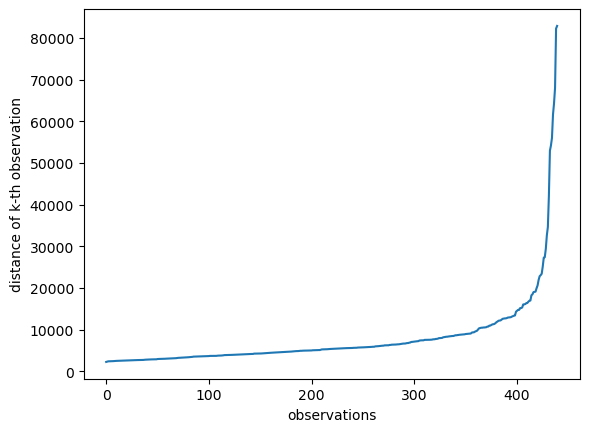

In [395]:
dbscan_eps_elbow(X_customer)

In [402]:
model = make_pipeline(
    preprocess_customer,
    DBSCAN(eps=10_000, min_samples=22),
)
model.fit(X_customer)

df_customer["d_cluster"] = model.named_steps["dbscan"].labels_

In [403]:
df_customer["d_cluster"].value_counts()

0    440
Name: d_cluster, dtype: int64

#### Country Data

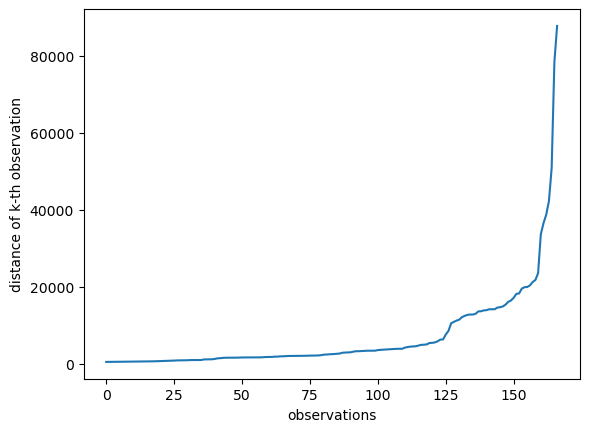

In [399]:
dbscan_eps_elbow(X_country)

In [409]:
model = make_pipeline(
    preprocess_country,
    DBSCAN(eps=5_000, min_samples=18),
)
model.fit(X_country)

df_country["d_cluster"] = model.named_steps["dbscan"].labels_

In [401]:
df_country["d_cluster"].value_counts()

0    167
Name: d_cluster, dtype: int64

---